In [82]:
import pandas as pd
df = pd.read_stata('macoursetal_main.dta')  

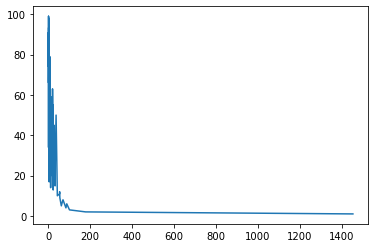

In [184]:
import matplotlib.pyplot as plt
plt.plot(df.martians_pct.value_counts().values, df.martians_pct.value_counts().index)

In [186]:
df[["male","s1male_06"]]

,male,s1male_06
0,1.0,NaN
1,0.0,female
2,1.0,male
3,1.0,male
4,1.0,male
...,...,...
4506,1.0,NaN
4507,1.0,NaN
4508,1.0,NaN
4509,1.0,NaN


In [193]:
pd.crosstab(df.male, df.s1male_06, dropna=False)

s1male_06,female,male
male,,
0.0,1650,5
1.0,5,1672


In [199]:
df.a7a_caution_06.isna().sum()

1200

In [197]:
pd.crosstab(df.a7a_delay_06, df.a7a_caution_06, dropna=False)

a7a_caution_06,0.0,1.0
a7a_delay_06,,
0.0,1312,622
1.0,0,1377


In [194]:
df.hogarid08.value_counts()

7.030490e+11    6
7.042050e+11    6
7.022610e+11    6
7.016430e+11    6
7.043820e+11    5
               ..
7.027450e+11    1
7.027440e+11    1
7.027370e+11    1
7.027350e+11    1
7.030020e+11    1
Name: hogarid08, Length: 2622, dtype: int64

In [195]:
df.age_transfer.value_counts(dropna=False)

 56.0    62
 60.0    61
 68.0    59
 70.0    58
 66.0    55
         ..
-36.0    17
-37.0    13
-38.0     9
-39.0     3
-40.0     2
Name: age_transfer, Length: 113, dtype: int64

In [196]:
df_age=df[["age_transfer", "age_months_06"]]

In [170]:
series=df_age.age_transfer-df_age.age_months_06
series.value_counts()

-9.0     2159
-8.0      837
-10.0     277
-21.0      14
-11.0       9
-20.0       5
 3.0        5
-19.0       4
-7.0        4
 4.0        3
-6.0        2
 2.0        2
-15.0       1
-44.0       1
-33.0       1
-43.0       1
-18.0       1
-5.0        1
-13.0       1
-4.0        1
-26.0       1
-12.0       1
 15.0       1
 28.0       1
dtype: int64

In [162]:
df.age_transfer.isna().sum()

46

In [160]:
df.age_months_06.value_counts(dropna=False)

NaN     1178
65.0      62
31.0      57
68.0      54
79.0      54
        ... 
85.0       1
89.0       1
91.0       1
82.0       1
92.0       1
Name: age_months_06, Length: 88, dtype: int64

Variables que considerem en la predicció inicial:
- s1age_head_05: age for the household head at time of interview 
- s1hhsize_05 : household size
- s1hhsz_undr5_05s: # people under 5 yrs in hh
- 1hhsz_5_14_05:  # people between 5 and 15 in hh
- s1hhsz_15_24_05: # people between 15 and 25 in hh
- s1hhsz_25_64_05: # people between 25 and 65 in hh
- s1hhsz_65plus_05: # people 65 yrs and over in hh
- s1male_head_05: gender of hh head        (categorical)
- s4p6_vitamina_i_05: vitamin A in last 6 mos,under 5y         (categorical)
- tvip_05: TVIP Raw score
- height_05: Height-for-age z-score
- a10whz_05: weight for height z-score
- weight_05: Weight-for_age z_score
- age_transfer: Age in months at time of first transfer
- bweight: Birth weight
- male: =1 for boys, =0 for girls
- s4p7_parasite_i_06: Got deworming medicine in last 6 months        (categorical)
- ed_mom: Number of years of education mother at baseline
- MUN1: Municipal dummy 1
- MUN2: Municipal dummy 2
- MUN3: Municipal dummy 3
- MUN4: Municipal dummy 4
- MUN5: Municipal dummy 5
- MUN6: Municipal dummy 6
- com_haz_05: community average baseline height-for-age
- com_waz_05: community average baseline weight-for-age
- com_tvip_05: Community average baseline tvip score
- com_control_05: Community average baseline weight controls
- com_vit_05: Community average children received vitamins
- com_deworm_05: Community average children received deworming medicine
- weighted_05: Weighed in last 6 months


In [83]:
df1=df[["s1age_head_05", "s1hhsize_05","s1hhsz_undr5_05","s1hhsz_5_14_05","s1hhsz_15_24_05","s1hhsz_25_64_05",
        "s1hhsz_65plus_05","s1male_head_05","s4p6_vitamina_i_05","tvip_05","height_05","a10whz_05","weight_05",
        "age_transfer","bweight","male","s4p7_parasite_i_06","ed_mom","MUN1","MUN2", "MUN3","MUN4","MUN5",
        "MUN6", "com_haz_05","com_waz_05","com_tvip_05","com_control_05","com_vit_05","com_deworm_05","weighted_05"]]

In [84]:
df1

,s1age_head_05,s1hhsize_05,s1hhsz_undr5_05,s1hhsz_5_14_05,s1hhsz_15_24_05,s1hhsz_25_64_05,s1hhsz_65plus_05,s1male_head_05,s4p6_vitamina_i_05,tvip_05,...,MUN4,MUN5,MUN6,com_haz_05,com_waz_05,com_tvip_05,com_control_05,com_vit_05,com_deworm_05,weighted_05
0,30.0,4.0,0.0,2.0,0.0,2.0,0.0,male,NaN,NaN,...,1.0,0.0,0.0,-1.262231,-1.261618,7.500000,0.962963,0.925926,0.629630,NaN
1,35.0,5.0,1.0,2.0,0.0,2.0,0.0,male,no,NaN,...,1.0,0.0,0.0,-0.898214,-0.945974,3.800000,0.857143,0.571429,0.285714,1.0
2,56.0,8.0,1.0,1.0,3.0,3.0,0.0,male,no,4.0,...,1.0,0.0,0.0,-1.252950,-1.099559,9.833333,0.857143,0.685714,0.628571,1.0
3,49.0,12.0,1.0,5.0,2.0,3.0,0.0,male,yes,6.0,...,0.0,1.0,0.0,-1.186018,-1.167046,5.750000,0.944444,0.861111,0.500000,1.0
4,49.0,12.0,1.0,5.0,2.0,3.0,0.0,male,no,NaN,...,0.0,1.0,0.0,-1.186018,-1.167046,5.750000,0.944444,0.861111,0.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,47.0,10.0,1.0,2.0,3.0,4.0,0.0,male,NaN,NaN,...,1.0,0.0,0.0,-1.108303,-0.816282,15.125000,0.957447,0.872340,0.638298,NaN
4507,51.0,5.0,0.0,0.0,3.0,2.0,0.0,male,NaN,NaN,...,0.0,0.0,0.0,-0.860973,-0.515418,4.333333,0.956522,0.869565,0.608696,NaN
4508,32.0,3.0,0.0,1.0,1.0,1.0,0.0,male,NaN,NaN,...,1.0,0.0,0.0,-0.241637,-0.473147,5.000000,1.000000,1.000000,1.000000,NaN
4509,25.0,4.0,2.0,0.0,1.0,1.0,0.0,male,NaN,NaN,...,0.0,0.0,1.0,-1.864106,-1.570407,3.666667,0.893617,0.914894,0.744681,NaN


In [85]:
df1.dtypes

s1age_head_05          float32
s1hhsize_05            float32
s1hhsz_undr5_05        float32
s1hhsz_5_14_05         float32
s1hhsz_15_24_05        float32
s1hhsz_25_64_05        float32
s1hhsz_65plus_05       float32
s1male_head_05        category
s4p6_vitamina_i_05    category
tvip_05                float64
height_05              float32
a10whz_05              float32
weight_05              float32
age_transfer           float32
bweight                float32
male                   float32
s4p7_parasite_i_06    category
ed_mom                 float32
MUN1                   float64
MUN2                   float64
MUN3                   float64
MUN4                   float64
MUN5                   float64
MUN6                   float64
com_haz_05             float32
com_waz_05             float32
com_tvip_05            float32
com_control_05         float32
com_vit_05             float32
com_deworm_05          float32
weighted_05            float32
dtype: object

In [86]:
df1.isna().sum().sort_values()

s1age_head_05           46
com_vit_05              46
com_control_05          46
com_tvip_05             46
com_waz_05              46
com_haz_05              46
MUN6                    46
MUN5                    46
MUN4                    46
MUN3                    46
MUN2                    46
MUN1                    46
com_deworm_05           46
male                    46
s1male_head_05          46
s1hhsize_05             46
s1hhsz_undr5_05         46
s1hhsz_5_14_05          46
s1hhsz_15_24_05         46
s1hhsz_25_64_05         46
age_transfer            46
s1hhsz_65plus_05        46
ed_mom                 303
s4p7_parasite_i_06    1195
bweight               1644
weighted_05           1912
s4p6_vitamina_i_05    1966
weight_05             2044
height_05             2053
a10whz_05             2092
tvip_05               3408
dtype: int64

In [87]:
df1.s4p6_vitamina_i_05.value_counts(dropna=False)

NaN    1966
yes    1761
no      784
Name: s4p6_vitamina_i_05, dtype: int64

In [88]:
df1.s4p7_parasite_i_06.value_counts(dropna=False)

yes    2018
no     1298
NaN    1195
Name: s4p7_parasite_i_06, dtype: int64

Tenim 46 usuaris que presenten NaN en tots els camps, els eliminem.
Pel que fa a la resta tenim NaN en: 
- ed_mom (Number of years of education mother at baseline)
- s4p6_parasite_i_06 (Got deworming medicine in last 6 months)
- bweight  (Birth weight)    
- weighted_05 ( Weight-for_age z_score)        
- s4p6_vitamina_i_05 (vitamin A in last 6 mos,under 5y)  
- weight_05 (weight-for-age z-score)   
- height_05 ( Height-for-age z-score)
- a10whz_05 (weight for height z-score)       
- tvip_05 ( TVIP Raw score)  

Podriem assignar als Nan
- Mean/median: ed_mom, bweight,  weighted_05, weight_05,  height_05, a10whz_05, tvip_05 
- One hot ignorant NaN: s4p7_parasite_i_06, s4p6_vitamina_i_05 

In [89]:
# eliminen els 46 usuaris que han abandonat l'experiment
df1.drop(df1[df1.isnull().all(axis=1)].index, inplace=True)

C:\Users\Usuari\AppData\Local\Temp\ipykernel_5664\1020930513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1[df1.isnull().all(axis=1)].index, inplace=True)


In [90]:
df1.shape

(4465, 31)

In [91]:
#donem valor a la resta de NaNs segons l'estratègia anterior
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="constant",fill_value='Unknown')),
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')),
    ])


num_attribs = ["s1age_head_05", "s1hhsize_05","s1hhsz_undr5_05","s1hhsz_5_14_05","s1hhsz_15_24_05","s1hhsz_25_64_05",
        "s1hhsz_65plus_05","tvip_05","height_05","a10whz_05","weight_05",
        "age_transfer","bweight","male","ed_mom","MUN1","MUN2", "MUN3","MUN4","MUN5",
        "MUN6", "com_haz_05","com_waz_05","com_tvip_05","com_control_05","com_vit_05","com_deworm_05","weighted_05"]
cat_attribs = ["s4p7_parasite_i_06", "s4p6_vitamina_i_05", "s1male_head_05"]


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

clean_df1= full_pipeline.fit_transform(df1)

In [135]:
df1.s4p7_parasite_i_06

0       NaN
1        no
2       yes
3       yes
4       yes
       ... 
4506    NaN
4507    NaN
4508    NaN
4509    NaN
4510    NaN
Name: s4p7_parasite_i_06, Length: 4465, dtype: category
Categories (2, object): ['no' < 'yes']

In [136]:
[row[29] for row in clean_df1]

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [93]:
[df1[[col]].value_counts(dropna=False) for col in cat_attribs]

[s4p7_parasite_i_06
 yes                   2018
 no                    1298
 dtype: int64,
 s4p6_vitamina_i_05
 yes                   1761
 no                     784
 dtype: int64,
 s1male_head_05
 male              3839
 female             626
 dtype: int64]

In [94]:
clean_df1.shape

(4465, 36)

In [95]:
df1.s1male_head_05.value_counts(dropna=False)

male      3839
female     626
Name: s1male_head_05, dtype: int64

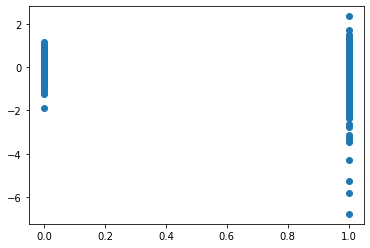

In [204]:
plt.scatter(df.mominhouse_06, df.z_all_06 )

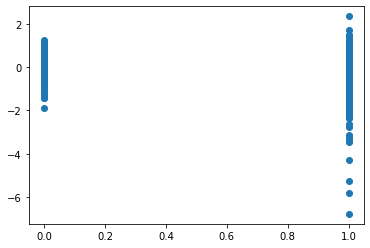

In [205]:
plt.scatter(df.guardianmom_06, df.z_all_06 )

In [206]:
pd.crosstab(df.guardianmom_06, df.mominhouse_06, dropna=False)

mominhouse_06,0.0,1.0
guardianmom_06,,
0.0,200,177
1.0,0,3086


In [210]:
df.s4p39_06.value_counts()

0.0     3089
3.0       61
2.0       43
4.0       29
8.0       23
5.0       22
1.0       20
15.0       9
7.0        8
6.0        6
30.0       5
14.0       1
11.0       1
16.0       1
20.0       1
Name: s4p39_06, dtype: int64

(0.0, 50.0)

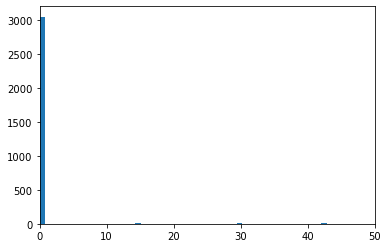

In [278]:
import matplotlib.pyplot as plt
plt.hist(df.s6wrkdys_agwa_i_06_mom, bins=500)
plt.xlim(0,50)

In [279]:
df.s6wrkdys_agwa_i_06_mom.value_counts()

0.0      3054
60.0       37
90.0       31
30.0       18
120.0      14
360.0       7
15.0        6
42.0        5
1.0         4
7.0         4
22.0        4
12.0        4
5.0         3
210.0       3
150.0       3
180.0       3
45.0        3
21.0        2
72.0        2
14.0        2
8.0         2
28.0        2
420.0       1
26.0        1
19.0        1
300.0       1
330.0       1
240.0       1
270.0       1
9.0         1
Name: s6wrkdys_agwa_i_06_mom, dtype: int64

In [237]:
df.s4p39_06.unique()

array([nan,  0.,  3.,  5.,  1.,  2.,  4., 15.,  8.,  7.,  6., 14., 11.,
       16., 30., 20.])

In [291]:
df[df.s4p39_06==0].z_all_06.values

array([False, False, False, ..., False, False, False])

In [233]:
df.s4p39_06.unique()
for i in df.s4p39_06.unique():
    [df[df.s4p39_06==0].z_all_06.values

SyntaxError: unexpected EOF while parsing (4116902906.py, line 2)

In [304]:
df_temp=df[["z_all_06", "s4p39_06"]]

In [305]:
df_temp1=df_temp.dropna()

In [ ]:
plot_vec=[df_temp[df_temp.s4p39_06==0].z_all_06.values for i in df_temp.s4p39_06.unique()[1:]]
plot_pos=df_temp.s4p39_06.unique()[1:]

C:\Users\Usuari\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
C:\Users\Usuari\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


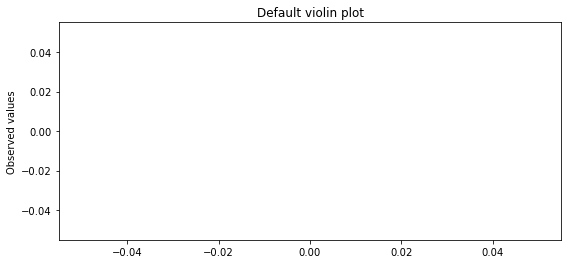

In [306]:

plot_vec=[df_temp[df_temp.s4p39_06==0].z_all_06.values for i in df_temp.s4p39_06.unique()[1:]]
plot_pos=df_temp.s4p39_06.unique()[1:]


fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
vp=ax1.violinplot(dataset=plot_vec, positions=plot_pos, points=100, widths=1000, showmeans=True,
                     showextrema=True)

for body in vp['bodies']:
    body.set_alpha(1)

plt.show()

In [281]:
df[df.s4p39_06==0].z_all_06.isna().sum()

14

In [283]:
len(df[df.s4p39_06==0].z_all_06.values)

3089

In [289]:
import numpy as np
a=df[df.s4p39_06==0].z_all_06.values
a

array([ 0.01125175, -0.5053326 ,  0.12040125, ...,  0.4184822 ,
        0.03532236, -0.03708899], dtype=float32)

In [252]:
plot_vec=[df[df.s4p39_06==i].z_all_06.values for i in df.s4p39_06.unique()[1:]]
plot_pos=df.s4p39_06.unique()[1:]


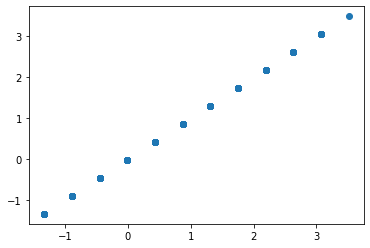

In [255]:
plt.scatter(df.z_memory_06, df.z_memory_06m)